# Accessing data with CliMetLab

Here are a few examples on how to get data into python using CliMetLab.

More examples can be found in the CliMetLab documentation (https://climetlab.readthedocs.io/en/latest/examples.html).

## Loading various sources

A source is a "something providing data". It needs some parameters to define the actual location of the data. For instance, a source and be a URL, a remote or local server, a database, or a file, etc.

Below are a few examples of using ``cml.load_source()``.

Notice how: 
- The API to retrieve the data is similar.
- Credentials are requested if needed with appropriate help message, then saved locally.
- Data is provided as pandas.Dataframe or xarray.Dataset.

Let's download a some files for the examples:


In [4]:
!test -f test.grib || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib
!test -f test.nc || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc
!test -f temp.bufr || wget http://download.ecmwf.int/test-data/metview/gallery/temp.bufr

Der Befehl "test" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
--2023-02-22 14:07:29--  https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.grib [following]
--2023-02-22 14:07:29--  https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.grib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1052 (1.0K) [application/octet-stream]
Saving to: 'test.grib'

     0K .                                                     100% 28.1M=0s

2023-02-22 14:07:29 (28.1 M

In [5]:
import climetlab as cml

How to read data from a GRIB file:

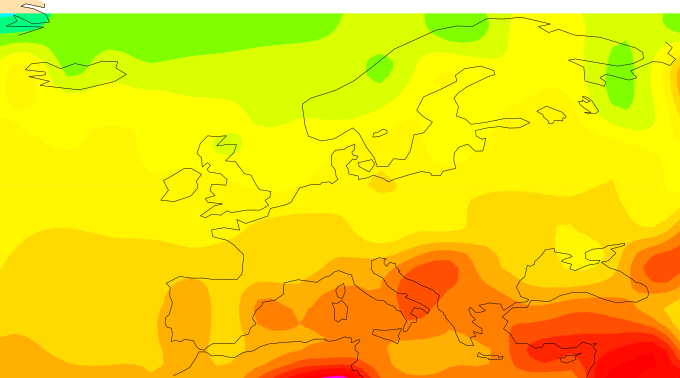

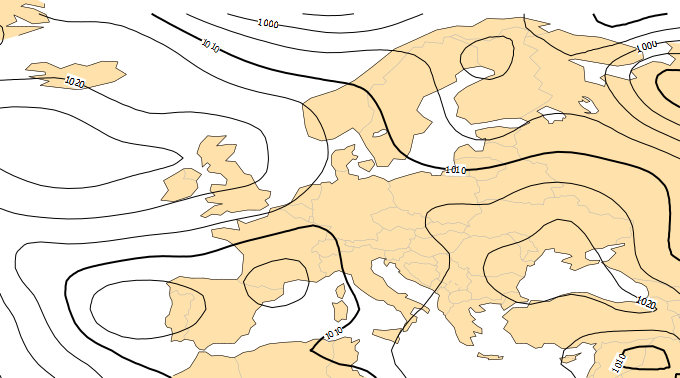

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int32 0
  * time        (time) datetime64[ns] 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T14:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ds = cml.load_source('file', 'test.grib')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

How to read data from a netCDF file:

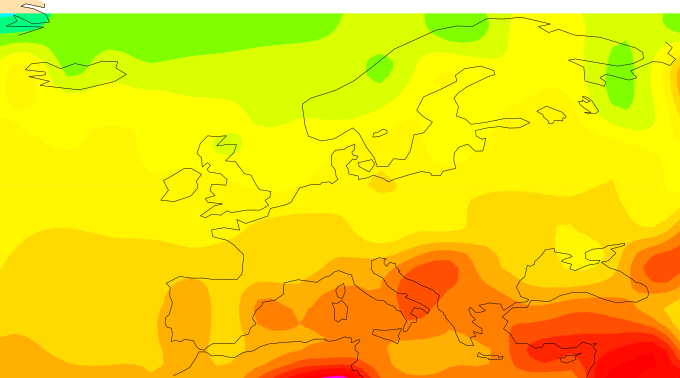

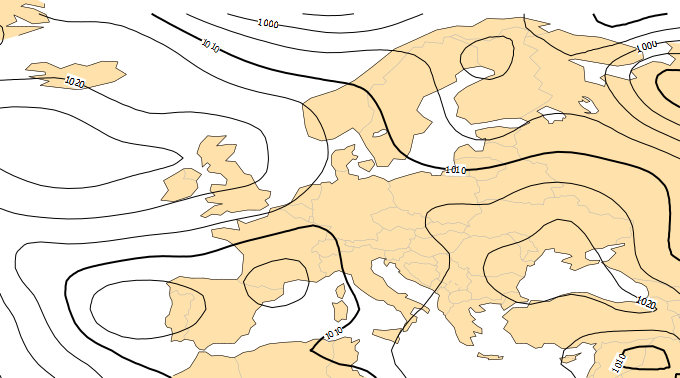

<xarray.Dataset>
Dimensions:     (longitude: 19, latitude: 11)
Coordinates:
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
    number      int32 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     int32 ...
    valid_time  datetime64[ns] ...
Data variables:
    t2m         (latitude, longitude) float32 dask.array<chunksize=(11, 19), meta=np.ndarray>
    msl         (latitude, longitude) float32 dask.array<chunksize=(11, 19), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 GRIB to CDM+CF via cfgrib-0.9.5/ecCodes-2.17.0 w...

In [8]:
ds = cml.load_source('file', 'test.nc')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

How to read data from a BUFR file:

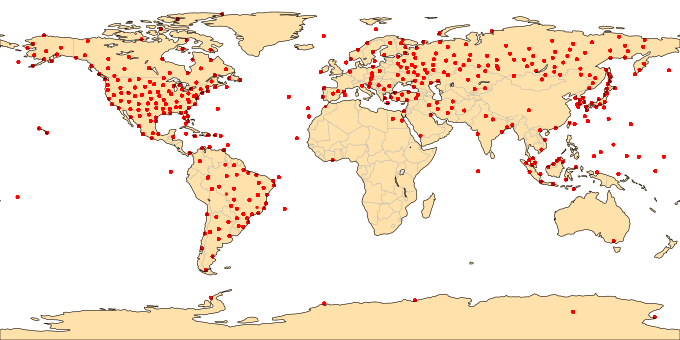

,stationNumber,latitude,longitude,pressure,airTemperature,data_datetime
0,907,58.47,-78.08,100300.0,258.3,2008-12-08 12:00:00
1,907,58.47,-78.08,100000.0,259.7,2008-12-08 12:00:00
2,907,58.47,-78.08,99800.0,261.1,2008-12-08 12:00:00
3,907,58.47,-78.08,99100.0,261.7,2008-12-08 12:00:00
4,907,58.47,-78.08,92500.0,258.1,2008-12-08 12:00:00
...,...,...,...,...,...,...
26191,968,25.03,121.52,10000.0,197.9,2008-12-08 12:00:00
26192,968,25.03,121.52,9520.0,196.3,2008-12-08 12:00:00
26193,968,25.03,121.52,7000.0,201.5,2008-12-08 12:00:00
26194,968,25.03,121.52,5000.0,209.1,2008-12-08 12:00:00


In [9]:
ds = cml.load_source('file', 'temp.bufr')
df = ds.to_pandas(
    columns=(
        "stationNumber",
        "latitude",
        "longitude",
        "data_datetime",
        "pressure",
        "airTemperature",
    ),
    filters={},
)
cml.plot_map(df, projection="global")
df

The purpose of the "file" source is to open **any** file, CliMetLab guess what type of file is provided.

## Reading from a URL `cml.load_source("url", URL)`

How to read data from a GRIB URL (using the climetlab source "url")

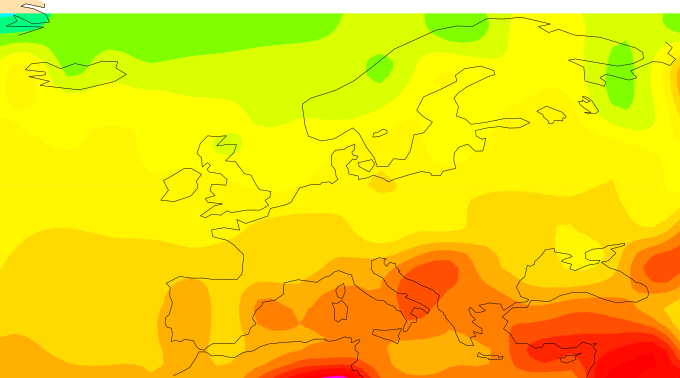

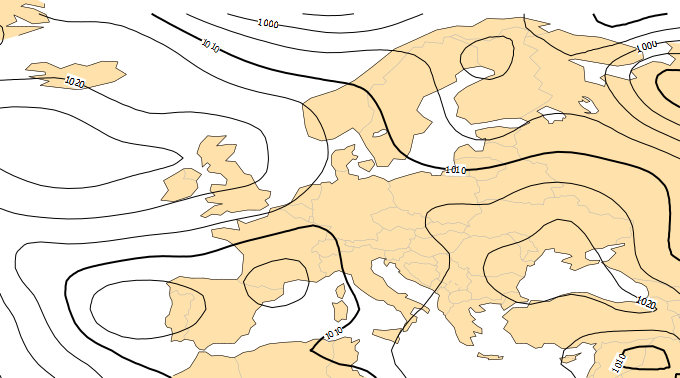

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int32 0
  * time        (time) datetime64[ns] 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T14:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
ds = cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

In [11]:
cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc')
cml.load_source('url', 'http://download.ecmwf.int/test-data/metview/gallery/temp.bufr')

Home page,-
Documentation,-
Citation,-
Licence,-


In [20]:
# Downloading 32M of data.
URL = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv"
data = cml.load_source("url", URL)
pd = data.to_pandas()

2023-02-22 14:34:20,069 INFO Downloading https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv


NotImplementedError: climetlab.readers.text.TextReader.to_pandas() on C:\Users\frei_p\AppData\Local\Temp\climetlab-FREI_P\url-e29d836ce6a5ea6e24cbb4398dd11140a280205e0248a9ad468bde15e1727667.SP.list.v04r00.csv

In [21]:
uma = pd[pd.NAME == "UMA:VELI"]
cml.plot_map(uma, style="cyclone-track")

NameError: name 'pd' is not defined

As shown below, data can be read from different sources, the API is similar: "load_source" with keywords to specify the data requested.

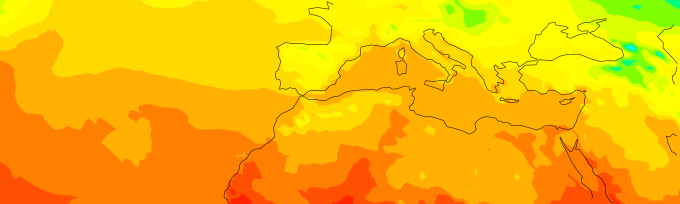

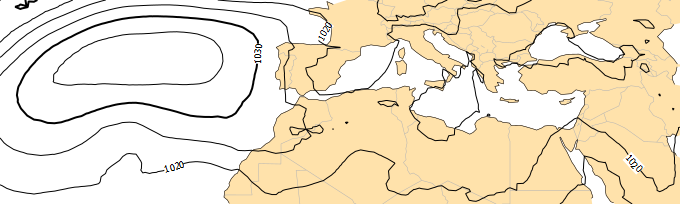

In [22]:
source = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=["2t", "msl"],
    product_type="reanalysis",
    area=[50, -50, 20, 50],
    date="2011-12-02", # ["2011-12-02", "2011-12-03"] for several dates
    time="12:00",
)
for s in source:
    cml.plot_map(s)

In [25]:
source = cml.load_source(
    "mars",
    param=["2t", "msl"],
    levtype="sfc",
    area=[50, -50, 20, 50],
    grid=[1, 1],
    date="2011-12-02",
    
)
for s in source:
    cml.plot_map(s)
source.to_xarray()

API url:  https://api.ecmwf.int/v1


API key:  ········


Your email:  prisco.f@hotmail.com


2023-02-22 15:07:35,596 INFO API key saved to 'C:\Users\frei_p/.ecmwfapirc'


2023-02-22 15:07:35 ECMWF API python library 1.6.3
2023-02-22 15:07:35 ECMWF API at https://api.ecmwf.int/v1
2023-02-22 15:07:35 Welcome Prisco Frei


APIException: "ecmwf.API error 1: User 'prisco.f@hotmail.com' has no access to services/mars"

2023-02-22 15:10:47,321 INFO Downloading <multiple>


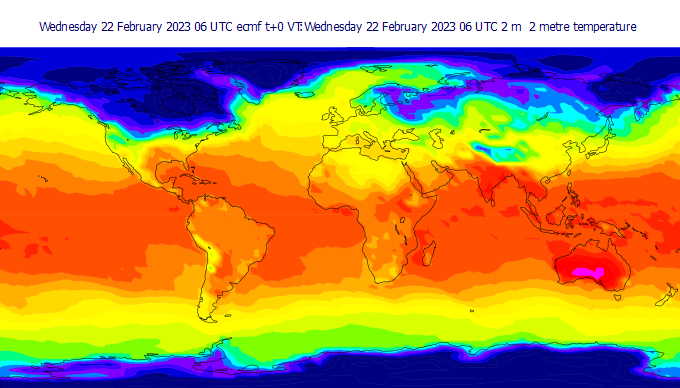

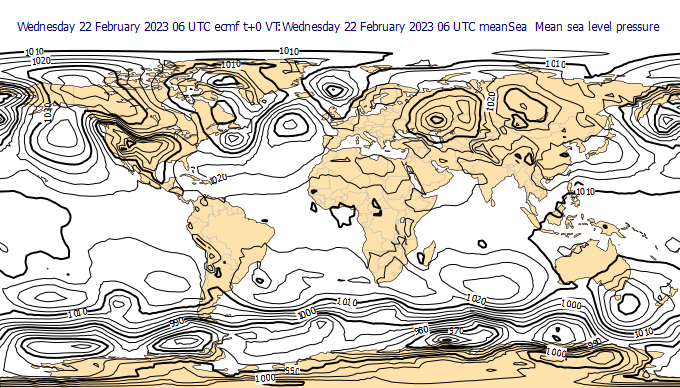

<xarray.Dataset>
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 451,
                        longitude: 900, meanSea: 1)
Coordinates:
  * time               (time) datetime64[ns] 2023-02-22T06:00:00
  * step               (step) timedelta64[ns] 00:00:00
  * heightAboveGround  (heightAboveGround) float64 2.0
  * latitude           (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude          (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time         (time, step) datetime64[ns] ...
  * meanSea            (meanSea) float64 0.0
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 ...
    msl                (time, step, meanSea, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T15:10 GRIB to CDM+CF via cfgrib-0.9.1...

In [26]:
source = cml.load_source(
    "ecmwf-open-data",
    param=["2t", "msl"],
)
for s in source:
    cml.plot_map(s, title=True)
source.to_xarray()

In [27]:
source = cml.load_source(
    "mars",
    type="ofb",
    obsgroup="conv",
    time="12",
    format="odb",
    reportype=16001,
    date="2020-05-18",
)
pd = source.to_pandas()

2023-02-22 15:11:01 ECMWF API python library 1.6.3
2023-02-22 15:11:01 ECMWF API at https://api.ecmwf.int/v1
2023-02-22 15:11:02 Welcome Prisco Frei


APIException: "ecmwf.API error 1: User 'prisco.f@hotmail.com' has no access to services/mars"

## Dataset

A dataset is a clearly identified set of data. It has a name, can be cited, has documentation and, hopefully, somebody is maintaining it.

A dataset is an object created using cml.load_dataset(name, arg1, arg2=..., ...)

- The name is a string that uniquely identifies the dataset.
- The argument(s) arg1 and keyword argument(s) arg2 can be used to specify a subset of the dataset.
- The data can be accessed using methods such as to_xarray() or to_pandas() or other.
- Relevant metadata are attached directly to the dataset to provides additional information such as an URL, a citation, licence, etc.

### Example dataset: huriccane database

In [28]:
atlantic = cml.load_dataset("hurricane-database", bassin="atlantic")
df = atlantic.to_pandas()

2023-02-22 15:15:33,708 INFO Downloading https://www.aoml.noaa.gov/hrd/hurdat/hurdat2.txt


In [29]:
df

,bassin,number,year,name,time,type,status,lat,lon,knots,category,pressure
0,AL,1,1851,unnamed,1851-06-25 00:00:00,,HU,28.0,-94.8,80.0,1,NaN
1,AL,1,1851,unnamed,1851-06-25 06:00:00,,HU,28.0,-95.4,80.0,1,NaN
2,AL,1,1851,unnamed,1851-06-25 12:00:00,,HU,28.0,-96.0,80.0,1,NaN
3,AL,1,1851,unnamed,1851-06-25 18:00:00,,HU,28.1,-96.5,80.0,1,NaN
4,AL,1,1851,unnamed,1851-06-25 21:00:00,L,HU,28.2,-96.8,80.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
50906,AL,16,2018,oscar,2018-11-03 12:00:00,,EX,57.9,-19.6,55.0,1,960.0
50907,AL,16,2018,oscar,2018-11-03 18:00:00,,EX,58.9,-17.1,50.0,1,964.0
50908,AL,16,2018,oscar,2018-11-04 00:00:00,,EX,59.8,-14.5,45.0,1,968.0
50909,AL,16,2018,oscar,2018-11-04 06:00:00,,EX,60.8,-12.1,40.0,1,973.0


### Example dataset: part of ERA5 

In [30]:
import climetlab as cml
ds = cml.load_dataset("era5-temperature", 
#    period=(1979, 1999), # This can be long to run.
    period=(1979, 1981),
    domain="France",
    time=12,
 )

2023-02-22 15:29:23,486 INFO Welcome to the CDS
2023-02-22 15:29:23,489 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-02-22 15:29:23,690 INFO Request is completed
2023-02-22 15:29:23,694 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data3/adaptor.mars.internal-1677027703.98443-25536-14-c8fb7090-002d-412f-952f-2cab9fb60e95.grib to C:\Users\frei_p\AppData\Local\Temp\climetlab-FREI_P\cds-retriever-a0e666107560537dfa3521e4f93592c1559a70df128bb361f05583099b387e95.cache.tmp (2.8M)
2023-02-22 15:29:24,598 INFO Download rate 3.1M/s                                                                                                                                                            
2023-02-22 15:29:25,130 INFO Welcome to the CDS
2023-02-22 15:29:25,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-02-22 15:29:25,214 INFO Requ

In [31]:
ds.to_xarray()

<xarray.Dataset>
Dimensions:     (number: 1, time: 1096, step: 1, surface: 1, latitude: 63,
                 longitude: 63)
Coordinates:
  * number      (number) int32 0
  * time        (time) datetime64[ns] 1979-01-01T12:00:00 ... 1981-12-31T12:0...
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 54.5 54.25 54.0 53.75 ... 39.5 39.25 39.0
  * longitude   (longitude) float64 -6.0 -5.75 -5.5 -5.25 ... 8.75 9.0 9.25 9.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-22T15:29 GRIB to CDM+CF via cfgrib-0.9.1...

Once the data has been downloaded. It is cached locally. The following will not download any additional data.


In [32]:
import climetlab as cml
ds = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="France",
    time=12,
 )

If the dataset is not found, CliMetLab provides the list of available datasets:

In [33]:
import climetlab as cml
cml.load_dataset('hurican-database-with-typo') # Fails

2023-02-22 15:30:14,979 INFO Downloading https://github.com/ecmwf-lab/climetlab-datasets/raw/main/datasets/hurican-database-with-typo.yaml
2023-02-22 15:30:15,631 WARNING Cannot find dataset 'hurican-database-with-typo', did you mean 'hurricane-database'?


NameError: Cannot find dataset 'hurican-database-with-typo' (values are: era5-precipitations, era5-single-levels, era5-temperature, example-dataset, high-low, hurricane-database, meteonet-radar-rainfall, meteonet-samples-ground-stations, meteonet-samples-masks, meteonet-samples-radar, meteonet-samples-weather-models, sample-bufr-data, sample-grib-data, weather-bench)


Additionnal datasets are defined with python plugins (via pip install), more details on this process in the "Dataset plugins" notebook.

More  examples can be found at (https://climetlab.readthedocs.io/en/latest/examples.html).

## Exercises
Find the mean temperature (2m temperature) in Italy in 1980, at 6am.


**Solutions:**

In [34]:
import climetlab as cml
data = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="Italy",
    time=6,
)
ds = data.to_xarray()
float(ds.mean().t2m)

2023-02-22 15:31:03,649 INFO Welcome to the CDS
2023-02-22 15:31:03,650 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-02-22 15:31:03,756 INFO Request is completed
2023-02-22 15:31:03,759 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data7/adaptor.mars.internal-1677057417.5977898-26308-3-06b802a9-6c0a-4e4e-af44-c4edc8b9dd50.grib to C:\Users\frei_p\AppData\Local\Temp\climetlab-FREI_P\cds-retriever-aa6308824a9555852822234e1accd9c9e28a360d7682a543c22c8dafa837e8e6.cache.tmp (2.8M)
2023-02-22 15:31:04,645 INFO Download rate 3.2M/s                                                                                                                                                            


284.1121520996094